<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-UlisesOrtega/blob/main/Semana8_ActividadSemanal7_RegresionesYKMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

># **Tecnológico de Monterrey**

## **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Ciencia y analítica de datos**

### **Profesor titular:** María de la Paz Rico Fernández
### **Profesor tutor:** Victoria Guerrero Orozco


>### **Nombre del estudiante:** Ulises Guadalupe Ortega Mena
>### **Matrícula:** A01793983

## **Actividad Semanal -- 7**
### **Regresiones y K means.**

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import metrics
from sklearn.metrics import r2_score
# to make this notebook's output stable across runs
np.random.seed(42)

# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [3]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [4]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

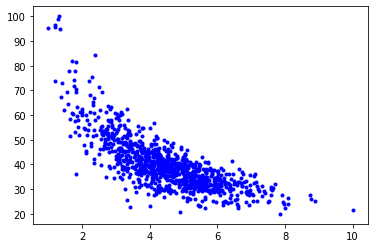

In [5]:
plt.plot(X,y,'b.')

In [6]:
# Arreglo para almacenar los resultados
data_mae_r2 = [] 

### 1.1) Divide los datos del costo de manufactura. Utiliza la función train_test_split.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

### 1.2) Regresión Lineal.
- Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.


In [8]:
from sklearn.linear_model import LinearRegression

# Crea modelo
modelo_lineal = LinearRegression(fit_intercept=True)
modelo_lineal.fit(X_train, y_train)

# Coeficientes e intercepción
print(modelo_lineal.coef_,modelo_lineal.intercept_)

[-5.98980103] 66.89748040122576


**Ecuación:**

$y = (-5.99)X + (66.9)$

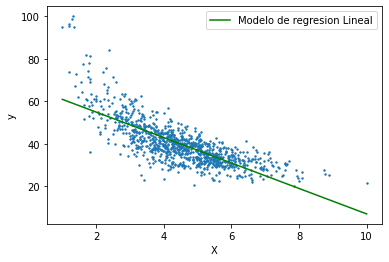

In [9]:
# Visualización

plt.scatter(X,y, s = 2) # Grafica los datos reales
plt.plot(X,modelo_lineal.predict(X),label ='Modelo de regresion Lineal', c = 'g') # Grafica el modelo generado
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

In [10]:
y_test_pred = modelo_lineal.predict(X_test)

# Errores
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Error medio Absoluto (MAE): 4.848701594938563
Root Mean Squared Error: 6.73635897582296


In [11]:
# r cuadrada
print('r2_score:',r2_score(y_test, y_test_pred))

r2_score: 0.6056489925064351


In [12]:
# Guarda resultados
data_mae_r2.append(('Modelo Lineal', metrics.mean_absolute_error(y_test, y_test_pred),r2_score(y_test, y_test_pred)))

### 1.3) Regresión Polinomial.
- Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [13]:
from sklearn.preprocessing import PolynomialFeatures


polinomial = PolynomialFeatures(degree=4, include_bias=False)

# Transforma variables de entrada al grado indicado de la función
X_train_polinomial = polinomial.fit_transform(X_train)
X_test_polinomial = polinomial.transform(X_test)

# Crea el modelo
modelo_polinomial = LinearRegression(fit_intercept=True)
modelo_polinomial.fit(X_train_polinomial,y_train)

# Coeficientes e intercepción
print(modelo_polinomial.coef_,modelo_polinomial.intercept_)

[-5.61088990e+01  1.27963942e+01 -1.36353217e+00  5.36268036e-02] 133.6163996436464


**Ecuación:**

$y = (-56.11)X + (12.8)X^2 + (-1.36)X^3 + (0.05)X^4 + (133.62)$

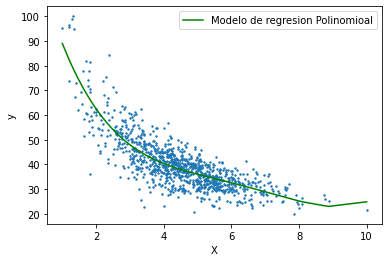

In [14]:
# Visualización

plt.scatter(X,y, s = 2) # Grafica los datos reales
plt.plot(X,modelo_polinomial.predict(polinomial.transform(X)),label ='Modelo de regresion Polinomioal', c = 'g') # Grafica el modelo generado
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

In [15]:
y_test_pred = modelo_polinomial.predict(X_test_polinomial)

# Errores
print('Error Medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Error Medio Absoluto (MAE): 4.298799661213017
Root Mean Squared Error: 5.5145385404028415


In [16]:
# r cuadrada
print('r2_score:',r2_score(y_test, y_test_pred))

r2_score: 0.7357281757691685


In [17]:
# Guarda resultados
data_mae_r2.append(('Modelo Polinomial', metrics.mean_absolute_error(y_test, y_test_pred),r2_score(y_test, y_test_pred)))

### 1.4) Regresión con Ridge y Lasso.
- Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.


### 1.4.1) Regresión con Ridge.

In [18]:
from sklearn.linear_model import Ridge

# Modelo
modelo_ridge = Ridge(alpha= 5)
modelo_ridge.fit(X_train_polinomial, y_train)

# Coeficientes e intercepción
print(modelo_polinomial.coef_,modelo_polinomial.intercept_)

[-5.61088990e+01  1.27963942e+01 -1.36353217e+00  5.36268036e-02] 133.6163996436464


**Ecuación:**

$y = (-8.65)X + (-2.51)X^2 + (0.65)X^3 + (-0.04)X^4 + (83.86)$

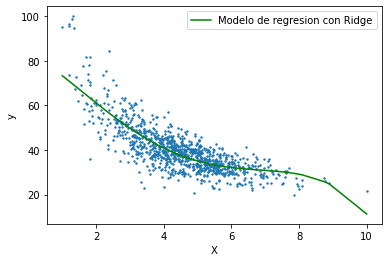

In [19]:
# Visualización

plt.scatter(X,y, s = 2) # Grafica los datos reales
plt.plot(X,modelo_ridge.predict(polinomial.transform(X)),label ='Modelo de regresion con Ridge', c = 'g') # Grafica el modelo generado
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

In [20]:
y_test_pred = modelo_ridge.predict(X_test_polinomial)

# Errores
print('Error Medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Error Medio Absoluto (MAE): 4.30746945289646
Root Mean Squared Error: 5.7344600909985655


In [21]:
# r cuadrada
print('r2_score:',r2_score(y_test, y_test_pred))

r2_score: 0.7142293785758068


In [22]:
# Guarda resultados
data_mae_r2.append(('Modelo Ridge', metrics.mean_absolute_error(y_test, y_test_pred),r2_score(y_test, y_test_pred)))

### 1.4.2) Regresión con Lasso.

In [23]:
from sklearn.linear_model import Lasso

# Modelo
modelo_lasso = Lasso(alpha= 0.05)
modelo_lasso.fit(X_train_polinomial, y_train)

# Coeficientes e intercepción
print(modelo_lasso.coef_,modelo_lasso.intercept_)

[-2.09806511e+01  1.53604747e+00  1.09372444e-01 -1.34081902e-02] 96.54776656432816


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.919e+03, tolerance: 7.762e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


**Ecuación:**

$y = (-20.98)X + (1.54)X^2 + (0.11)X^3 + (-0.013)X^4 + (96.55)$

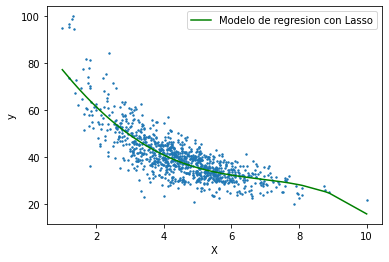

In [24]:
# Visualización

plt.scatter(X,y, s = 2) # Grafica los datos reales
plt.plot(X,modelo_lasso.predict(polinomial.transform(X)),label ='Modelo de regresion con Lasso', c = 'g') # Grafica el modelo generado
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

In [25]:
y_test_pred = modelo_lasso.predict(X_test_polinomial)

# Errores
print('Error Medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Error Medio Absoluto (MAE): 4.2726981318984105
Root Mean Squared Error: 5.625164128278013


In [26]:
# r cuadrada
print('r2_score:',r2_score(y_test, y_test_pred))

r2_score: 0.7250188605760728


In [27]:
# Guarda resultados
data_mae_r2.append(('Modelo Lasso', metrics.mean_absolute_error(y_test, y_test_pred),r2_score(y_test, y_test_pred)))

### 1.5) Grafica MAE y R2 de los cuatro métodos.

In [28]:
# Crea un dataframe con los valores obtenidos de MAE y R2 de los modelo
df_data_mae_r2 = pd.DataFrame(data_mae_r2,columns=['Modelo','MAE','R2'])
df_data_mae_r2

,Modelo,MAE,R2
0,Modelo Lineal,4.848702,0.605649
1,Modelo Polinomial,4.298800,0.735728
2,Modelo Ridge,4.307469,0.714229
3,Modelo Lasso,4.272698,0.725019


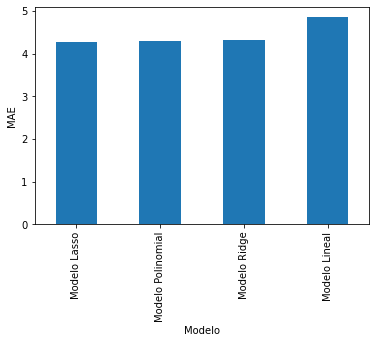

In [29]:
# Gráfica de MAE
df_data_mae_r2.sort_values(by='MAE').plot(x = 'Modelo', y = 'MAE', kind = 'bar', legend = False, ylabel = 'MAE')

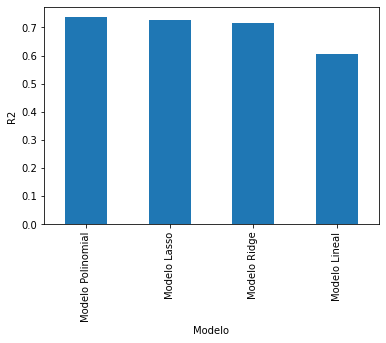

In [30]:
# Gráfica de R2
df_data_mae_r2.sort_values(by='R2', ascending=False).plot(x = 'Modelo', y = 'R2', kind = 'bar', legend = False, ylabel = 'R2')

### 1.6) Explica tus resultados.
- Qué método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?.


Aunque los valores del error absoluto medio de los 4 modelos son muy similares, optaría por el modelo de Lasso debido a que es el segundo mejor modelo en cuanto a R2 y el mejor en MAE, lo que significa que es un modelo con un error aceptable y que se ajusta bien a la curva que representa a los datos. Considero que es un error aceptable ya que no es una variación muy significativa respecto a los valores que toma la variable de salida. Los porcentajes que se usaron para el conjunto de entrenamiento fueron del 70% y 30% para el conjunto de prueba.


#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
735,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
2830,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
4106,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
16218,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
19964,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
1227,1761300310,20140827T000000,211000.0,4,2.00,1710,8288,1.5,0,0,...,7,1710,0,1970,0,98031,47.3947,-122.174,1710,7200
18849,7732410120,20140819T000000,790000.0,4,2.50,2690,8036,2.0,0,0,...,9,2690,0,1987,0,98007,47.6596,-122.144,2420,8087
19369,7010701383,20141017T000000,680000.0,3,2.50,1800,4400,1.0,0,0,...,7,1350,450,1970,0,98199,47.6599,-122.396,1920,4400
20164,291310170,20140804T000000,384500.0,3,2.50,1600,2610,2.0,0,0,...,8,1600,0,2005,0,98027,47.5344,-122.068,1445,1288
7139,4232901990,20140516T000000,605000.0,2,1.00,910,3600,1.0,0,0,...,7,910,0,1909,0,98119,47.6341,-122.361,1720,3600


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [33]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [34]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


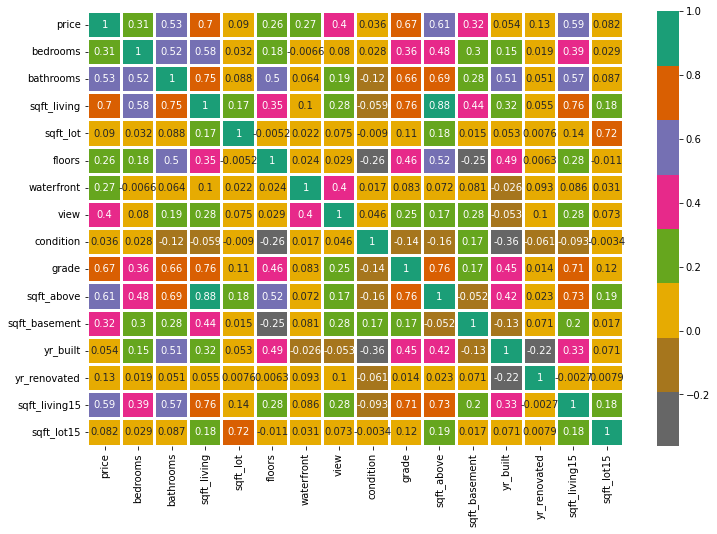

In [35]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [36]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [37]:
# Arreglo para almacenar los resultados
data_mae_r2_multi = [] 

### 2.1) Divide los datos. Utiliza la función train_test_split.

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 16209
Tamaño de X_train: (16209, 15)
**************************************************
Mumero total de registros en el test dataset: 5404
Tamaño del X_test: (5404, 15)


### 2.2) Regresión Múltiple Lineal.
- Realiza la regresión lineal: modelo generado (ecuación), sus errores y r cuadrada.

In [39]:
# Modelo
modelo_lineal_multi = LinearRegression(fit_intercept=True)
modelo_lineal_multi.fit(X_train, y_train)

# Coeficientes e intercepción de ecuación
print(modelo_lineal_multi.coef_,modelo_lineal_multi.intercept_)

[[-4.05703607e+04  3.96521515e+04  1.09413866e+02  2.13713273e-02
   3.06230218e+04  5.49303364e+05  4.21643141e+04  2.25483666e+04
   1.20081453e+05  5.22199913e+01  5.71938749e+01 -3.54102732e+03
   9.47396187e+00  2.67951091e+01 -5.46416596e-01]] [6131185.24407507]


In [40]:
y_test_pred = modelo_lineal_multi.predict(X_test)

# Errores
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Error medio Absoluto (MAE): 138436.85762226998
Root Mean Squared Error: 217462.56220720423


In [41]:
# r cuadrada
print('r2_score:',r2_score(y_test, y_test_pred))

r2_score: 0.6664268623194645


In [42]:
# Guarda resultados
data_mae_r2_multi.append(('Modelo Lineal', metrics.mean_absolute_error(y_test, y_test_pred),r2_score(y_test, y_test_pred)))

### 2.3) Regresión Múltiple Polinomial.
- Realiza la regresión polinomial completa, tu modelo generado (ecuación), sus errores y r cuadrada.

In [43]:
polinomial_multi = PolynomialFeatures(degree=4, include_bias=False)

# Transforma variables de entrada al grado indicado de la función
X_train_polinomial = polinomial_multi.fit_transform(X_train)
X_test_polinomial = polinomial_multi.transform(X_test)

In [44]:
# Modelo
modelo_polinomial_multi = LinearRegression(fit_intercept=True)
modelo_polinomial_multi.fit(X_train_polinomial,y_train)

# Coeficientes e intercepción de ecuación
print(modelo_polinomial_multi.coef_,modelo_polinomial_multi.intercept_)

[[-1.57672426e-05  1.08664048e-05  6.59373456e-06 ...  1.57782003e-11
   1.99682651e-13  1.49924408e-15]] [1584698.3759109]


In [45]:
y_test_pred = modelo_polinomial_multi.predict(X_test_polinomial)

# Errores
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Error medio Absoluto (MAE): 281684.4352377776
Root Mean Squared Error: 4686505.269388213


In [46]:
# r cuadrada
print('r2_score:',r2_score(y_test, y_test_pred))

r2_score: -153.92456592175012


In [47]:
# Guarda resultados
data_mae_r2_multi.append(('Modelo Polinomial', metrics.mean_absolute_error(y_test, y_test_pred),r2_score(y_test, y_test_pred)))

### 2.4) Realiza la regresión con Ridge y Lasso.
- Incluye la ecuación de tu modelo, errores y r cuadrada.

### 2.4.1) Realiza la regresión con Ridge.

In [48]:
# Modelo
modelo_ridge_multi = Ridge(alpha= 5)
modelo_ridge_multi.fit(X_train, y_train)

# Coeficientes e intercepción de ecuación
print(modelo_ridge_multi.coef_,modelo_ridge_multi.intercept_)

[[-4.06795517e+04  3.95886568e+04  1.09512466e+02  2.00933554e-02
   3.06239657e+04  5.24445156e+05  4.33269425e+04  2.25879097e+04
   1.19975326e+05  5.23941162e+01  5.71182439e+01 -3.53918992e+03
   9.78412209e+00  2.66779742e+01 -5.45137586e-01]] [6128376.24575638]


In [49]:
y_test_pred = modelo_ridge_multi.predict(X_test)

# Errores
print('Error Medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Error Medio Absoluto (MAE): 138463.20037932863
Root Mean Squared Error: 217555.50404096732


In [50]:
# r cuadrada
print('r2_score:',r2_score(y_test, y_test_pred))

r2_score: 0.666141668178494


In [51]:
# Guarda resultados
data_mae_r2_multi.append(('Modelo Ridge', metrics.mean_absolute_error(y_test, y_test_pred),r2_score(y_test, y_test_pred)))

### 2.4.2) Realiza la regresión con Lasso.

In [52]:
# Modelo
modelo_lasso_multi = Lasso(alpha= 10)
modelo_lasso_multi.fit(X_train, y_train)

# Coeficientes e intercepción
print(modelo_lasso_multi.coef_,modelo_lasso_multi.intercept_)

[-4.05563922e+04  3.96106443e+04  2.97242274e+02  2.12938928e-02
  3.05796449e+04  5.47843340e+05  4.22196811e+04  2.25215714e+04
  1.20069669e+05 -1.35565696e+02 -1.30619147e+02 -3.54054569e+03
  9.49891387e+00  2.67895500e+01 -5.46417529e-01] [6130450.70175133]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.431e+14, tolerance: 2.147e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [53]:
y_test_pred = modelo_lasso_multi.predict(X_test)

# Errores
print('Error Medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Error Medio Absoluto (MAE): 138438.42118056183
Root Mean Squared Error: 217467.6118668233


In [54]:
# r cuadrada
print('r2_score:',r2_score(y_test, y_test_pred))

r2_score: 0.6664113704541688


In [55]:
# Guarda resultados
data_mae_r2_multi.append(('Modelo Lasso', metrics.mean_absolute_error(y_test, y_test_pred),r2_score(y_test, y_test_pred)))

### 2.5) Grafica MAE y R2 de los cuatro métodos.

In [56]:
# Crea un dataframe con los valores obtenidos de MAE y R2 de los modelo
df_data_mae_r2_multi = pd.DataFrame(data_mae_r2_multi,columns=['Modelo','MAE','R2'])
df_data_mae_r2_multi

,Modelo,MAE,R2
0,Modelo Lineal,138436.857622,0.666427
1,Modelo Polinomial,281684.435238,-153.924566
2,Modelo Ridge,138463.200379,0.666142
3,Modelo Lasso,138438.421181,0.666411


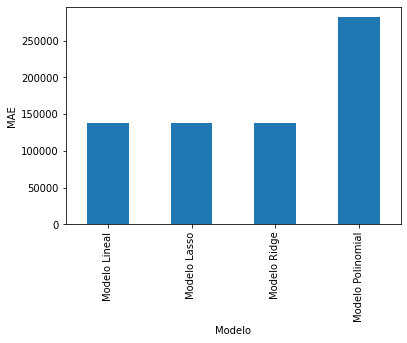

In [57]:
# Gráfica de MAE
df_data_mae_r2_multi.sort_values(by='MAE').plot(x = 'Modelo', y = 'MAE', kind = 'bar', legend = False, ylabel = 'MAE')

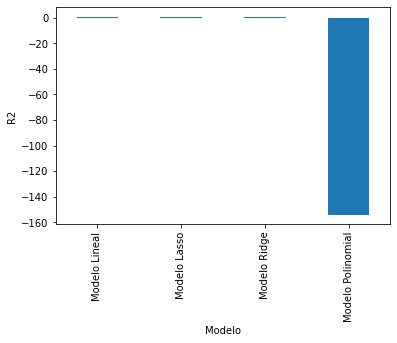

In [58]:
# Gráfica de R2
df_data_mae_r2_multi.sort_values(by='R2', ascending=False).plot(x = 'Modelo', y = 'R2', kind = 'bar', legend = False, ylabel = 'R2')

### 2.6) Explica tus resultados. 
- Qué método se aproxima mejor, ¿por qué?, ¿qué porcentajes de entrenamiento y evaluación usaste? ¿Que error tienes?, ¿es bueno?, ¿Cómo lo sabes?

El método que mejor se aproxima es el método lineal, aunque es por muy poca diferencia en el MAE respecto a los métodos de Lasso y Ridge, por lo que cualquiera de esos tres puede ser conveniente usar. Aún así, el MAE que tienen es un error considerable, el cual podría mejorar con una optimización a modelo, pero por lo pronto no lo considero bueno.
Se utilizó un 25% de los datos como conjunto de prueba y el 75% como conjunto de entrenamiento.


### 2.7) Agrega las conclusiones.


Como conclusión de los dos ejercicios realizados se puede identificar que el aumentar la complejidad de los datos nos trae la necesidad de ocupar algoritmos de ML más complejos para obtener un modelo más robusto para el momento de realizar predicciones, que pueda generalizar mejor los datos. Aunque no aplica para todos los casos, ya que, por ejemplo, en el ejercicio 2, un simple modelo de regresión linear se comportó de forma muy similar a los modelos Lasso y Ridge, por lo que se puede entender que los modelos más simples pueden tener un desempeño bastante bueno para conjuntos de datos que no se han trabajado muy extensamente en su preprocesamiento. 

# Ejercicio 3: Notebook 2. K means. 

Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber dónde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

**Encuentra el numero ideal de almacenes, justifica tu respuesta:**

- Encuentra las latitudes y longitudes de los almacenes, ¿qué ciudad es?, ¿a cuantas tiendas va surtir?, ¿sabes a que distancia estará?
- ¿Cómo elegiste el número de almacenes?, justifica tu respuesta técnicamente.

Adicionalmente, en el notebook notaras que al inicio exploramos los datos y los graficamos de manera simple, después nos auxiliamos de una librería de datos geográficos.

- ¿qué librerías nos pueden ayudar a graficar este tipo de datos?
- ¿Consideras importante que se grafique en un mapa?, ¿por qué?
- Agrega las conclusiones

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [59]:
! pip install geopandas qeds

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 16.7 MB 60.3 MB/s 
     |████████████████████████████████| 6.3 MB 46.6 MB/s 
     |████████████████████████████████| 179 kB 58.2 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=8422dea2a7dc1c53a86b9814a4372068869b61fee436ed729eeeb5e54c918fa7
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
Successfully built qeds


In [60]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos

In [61]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [62]:

df.head()


,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [64]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

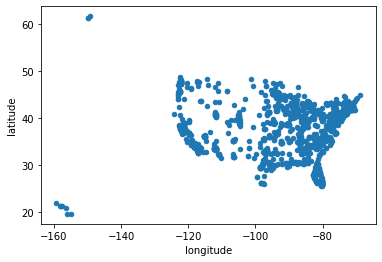

In [65]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [66]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [67]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [68]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [69]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [70]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [71]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

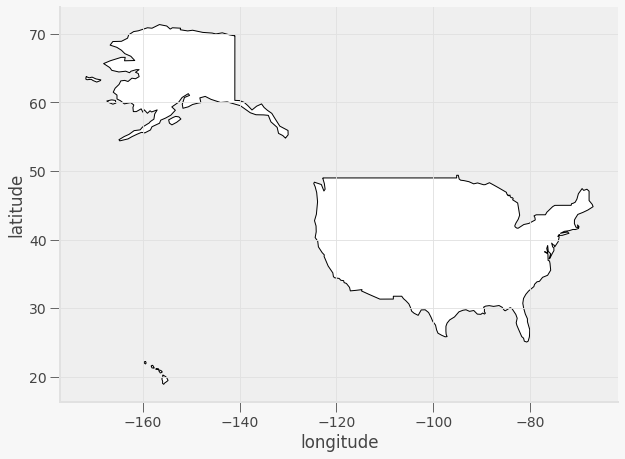

In [72]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

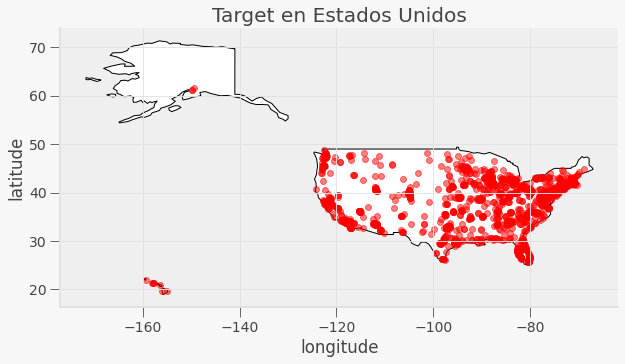

In [73]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

In [74]:
#tu codigo aquí
from sklearn.cluster import KMeans

In [75]:
# Listado de las distancias medias obtenidas
lista_distancias_medias = []

# Entrenamos un modelo para cada numero de cluster que queremos testear
K = np.arange(2,22)
for k in K:
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(latlong)
    # Tomamos la suma de las distancias para todas las instancias del dataset
    distancia_total = km.inertia_
    # Calculamos la distancia media y agregamos a la lista
    distancia_media = distancia_total/len(latlong)
    lista_distancias_medias.append(distancia_media)

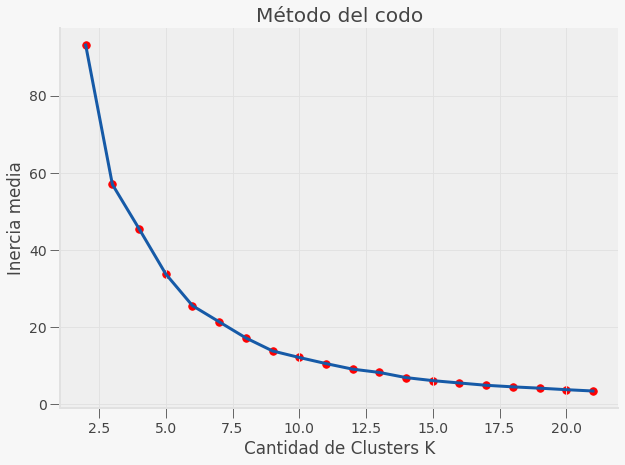

In [76]:
plt.figure(figsize = (10,7))
# Graficamos una linea continua y tambien unos puntos para resaltar los valores enteros de K.
plt.plot(K, lista_distancias_medias, lw=3)
plt.scatter(K, lista_distancias_medias, s=55, c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo')

plt.show()

In [77]:
# Se define y entrena el modelo
km = KMeans(n_clusters=12)
km = km.fit(latlong)
# Se obtiene la posición de los centros y las etiquetas
etiquetas_ = km.labels_
centros_ = km.cluster_centers_

In [78]:
almacenes_gdf = gpd.GeoDataFrame([f'Almacén {i}' for i in np.arange(centros_.shape[0])], geometry=[Point(xy) for xy in zip(centros_[:,1], centros_[:,0])]).rename(columns ={0:'Almacen'})
almacenes_gdf.head()

,Almacen,geometry
0,Almacén 0,POINT (-73.65439 41.31224)
1,Almacén 1,POINT (-108.58491 37.22130)
2,Almacén 2,POINT (-86.64781 41.31277)
3,Almacén 3,POINT (-118.92570 35.41109)
4,Almacén 4,POINT (-85.74577 33.70062)


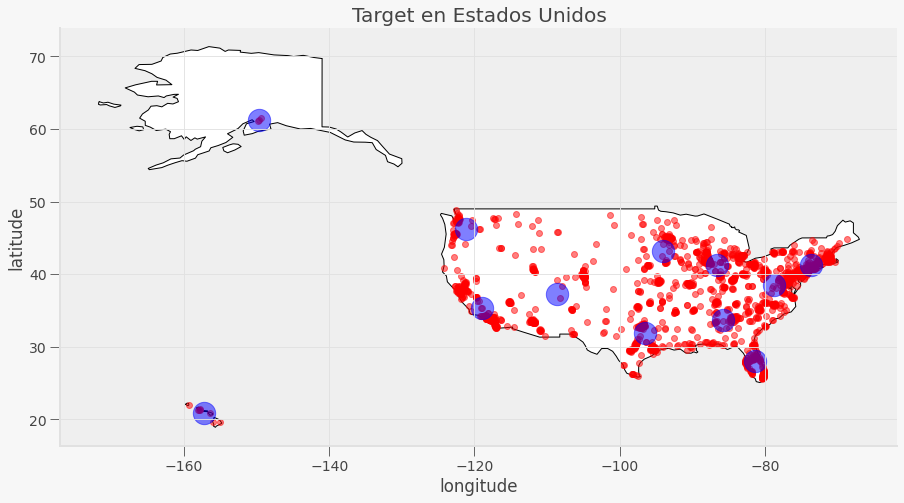

In [79]:
# Se grafica nuevamente el mapa con sucursales y almacenes

fig, gax = plt.subplots(figsize=(15,15))

world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# Sucursales
gdf.plot(ax=gax, color='red', alpha = 0.5)

# Almacenes
almacenes_gdf.plot(ax=gax, color='blue', alpha = 0.5, marker=".",markersize=2000)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [80]:
from geopy.geocoders import Nominatim

# Obtener ubicación de los almacenes
geolocator = Nominatim(user_agent='geoapiExercises')

print('Ubicacion de los almacenes:\n')

# Obtener al ubicación de cada uno de los almecenes
for _,row in almacenes_gdf.iterrows():
  lugar = geolocator.reverse(f"{row['geometry'].y},{row['geometry'].x}")
  print(f"{row['Almacen']}:\t{lugar.raw['address'].get('county','NA')},{lugar.raw['address'].get('state','NA')}")

Ubicacion de los almacenes:

Almacén 0:	Westchester County,New York
Almacén 1:	Montezuma County,Colorado
Almacén 2:	Starke County,Indiana
Almacén 3:	Kern County,California
Almacén 4:	Calhoun County,Alabama
Almacén 5:	Rockingham County,Virginia
Almacén 6:	Osceola County,Florida
Almacén 7:	NA,NA
Almacén 8:	Yakima County,Washington
Almacén 9:	Navarro County,Texas
Almacén 10:	Kossuth County,Iowa
Almacén 11:	Anchorage,Alaska


In [81]:
# Cantidad de tiendas que surtirá cada almacén
unique, counts = np.unique(etiquetas_, return_counts=True)

tiendas_x_almacen = pd.DataFrame(np.asarray((unique, counts)).T,columns=['Id Almacén','Tiendas'])
tiendas_x_almacen

,Id Almacén,Tiendas
0,0,280
1,1,127
2,2,287
3,3,218
4,4,135
5,5,238
6,6,125
7,7,8
8,8,74
9,9,197


- **Encuentra las latitudes y longitudes de los almacenes, ¿qué ciudad es?, ¿a cuantas tiendas va surtir?, ¿sabes a que distancia estará?**

Se obtuvieron las ciudades por medio de código en el siguiente resultado:

Ubicacion de los almacenes:

- Almacén 0:	Westchester County,New York
- Almacén 1:	Montezuma County,Colorado
- Almacén 2:	Starke County,Indiana
- Almacén 3:	Kern County,California
- Almacén 4:	Calhoun County,Alabama
- Almacén 5:	Rockingham County,Virginia
- Almacén 6:	Osceola County,Florida
- Almacén 7:	NA,NA
- Almacén 8:	Yakima County,Washington
- Almacén 9:	Navarro County,Texas
- Almacén 10:	Kossuth County,Iowa
- Almacén 11:	Anchorage,Alaska

La cantidad de tiendas que surtirá cada almacén se obtuve en la celda anterior y la distancia que se tiene de cada tienda hasta el almancén se puede obtener con base en las coordenadas de cada uno, pero será una distancia lineal, de punto a punto.

- **¿Cómo elegiste el número de almacenes?, justifica tu respuesta técnicamente.**

Se utilizó el método del codo, en donde se realiza una gráfica con cierto rango de poblibles cluster y su respectiva inercia (sumatoria de las distancias, elevada al cuadrado, de cada objeto del Cluster a su centroide). 

El método indica que se debe tomar en cuenta la cantidad de clusters en donde, en la gráfíca, ya no se presente mucha diferencia en el valor de la inercia, usualmente se presenta en el "codo" de la gráfica.

A partir de 12 clusters, el valor de la inercia ya no tiene una variación significante para las siguientes cantidades, es por ello que se tomó esa cantidad.

- **¿Qué librerías nos pueden ayudar a graficar este tipo de datos?**

Existe una gran variedad de librerías que nos pueden aportar mucho en esta tarea. Algunas de las que ubico son:

- ArcPy
- Folium
- Geemap
- GeoPy
- GDAL/OGR

- **¿Consideras importante que se grafique en un mapa?, ¿por qué?**

Si, para datos geográficos es preferible manejar un tipo de gráfico que permita identificar de forma clara las locaciones que se planean mostrar, así se tiene una perspectiva mucho más cómoda e identificable del entorno que estamos analizando. El proyectar puntos de localización en un plano cartesiano no otorga tanta información visual comparado con la proyección realizada sobre un mapa. Sobre un mapa tenemos un mejor entendimiento e interpretación de los datos de ubicación ya que un mapa es una herramienta con la que estamos más familiarizados. 

- **Conclusiones**

Como conclusión para el uso de aprendizaje no supervisado en este tipo de análisis me parece una muy buena herramienta para tener un primer acercamiento a una posible solución. En este caso se pudo realizar un primer análisis con una solución muy aceptable sobre cuántos almacenes se podría tener junto con su ubicación. Considero que, indagando más en el ejercicio y realizando un análisis mucho más profundo, esta solución podría cambiar, pero con esta primera revisión uno se pude dar una idea de por donde se podría encontrar la solución final, gracias a lo práctico que resulta el uso de este tipo de algoritmos.